In [1]:
source("Main.R")
source("Conf.R")
source("Utilities.R")
source("DAVID_query.R")
library("factoextra")
library("maptree")
library("ggpubr")
library(NMF)

library(repr)
fileDir = "/home/beraslan/jovian-work/analysisSingle/"
geneCutOff=4
targetCutOff=14

corrplot 0.84 loaded


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘pls’


The following object is masked from ‘package:corrplot’:

    corrplot


The following object is masked from ‘package:stats’:

    loadings


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following o

In [2]:
coefsAll_Control <- read.csv("/home/beraslan/jovian-work/analysisSingle/MixedEffectLMOutputs/ME_LMBetaCoefsALL_Control.csv", row.names = 1, )
pValsAll_Control <- read.csv("/home/beraslan/jovian-work/analysisSingle/MixedEffectLMOutputs/ME_LMPValuesALL_Control.csv", row.names = 1)

coefsAll <- read.csv("/home/beraslan/jovian-work/analysisSingle/MixedEffectLMOutputs/ME_LMBetaCoefsALL.csv", row.names = 1, )
pValsAll <- read.csv("/home/beraslan/jovian-work/analysisSingle/MixedEffectLMOutputs/ME_LMPValuesALL.csv", row.names = 1)
pValsAll <- pValsAll[rownames(pValsAll) %ni% c("Intercept", "n_genes", "mt_frac", "Group Var"),]
coefsAll <- coefsAll[rownames(coefsAll) %ni% c("Intercept", "n_genes", "mt_frac", "Group Var"),]

In [3]:
dim(coefsAll)

[1] 1031 6685

In [4]:
head(coefsAll)

,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,Pcmtd1,Rrs1,Vcpip1,Sgk3,Snhg6,⋯,Cacul1,Eif3a,Fam45a,Prdx3,Grk5,Zfp950,Csf2ra,Vamp7,AC149090.1,CAAA01118383.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GENE_4921501E09Rik_,0.140,0.050,0.064,0.116,-0.012,0.030,-0.103,-0.003,0.005,0.217,⋯,-0.114,0.052,0.073,-0.063,-0.001,0.041,0.051,0.000,0.003,-0.077
GENE_4930595M18Rik_,0.009,0.099,0.003,-0.004,0.006,0.034,0.041,-0.035,-0.018,0.000,⋯,0.085,0.054,-0.009,-0.022,0.014,-0.041,-0.030,-0.006,0.064,0.065
GENE_8030462N17Rik_,-0.126,-0.066,-0.174,-0.094,0.129,-0.030,0.066,-0.247,-0.038,0.097,⋯,-0.173,-0.018,0.125,-0.096,0.052,-0.203,-0.205,0.144,-0.122,0.009
GENE_Aamp_,0.084,0.062,0.038,0.121,0.043,-0.035,0.004,0.197,-0.044,-0.119,⋯,-0.010,0.047,-0.047,-0.179,-0.101,-0.079,-0.009,-0.043,-0.142,-0.151
GENE_Abtb1_,0.004,0.199,-0.143,-0.043,0.004,0.145,-0.114,-0.029,0.116,-0.026,⋯,0.019,-0.099,-0.069,-0.031,0.058,0.023,-0.113,0.150,-0.032,0.018
GENE_Abtb2_,0.063,0.001,0.053,0.090,-0.012,0.022,0.043,0.011,0.034,-0.035,⋯,0.073,0.040,-0.044,0.048,0.003,0.025,-0.054,-0.044,-0.067,-0.011


In [5]:
head(pValsAll)

,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,Pcmtd1,Rrs1,Vcpip1,Sgk3,Snhg6,⋯,Cacul1,Eif3a,Fam45a,Prdx3,Grk5,Zfp950,Csf2ra,Vamp7,AC149090.1,CAAA01118383.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GENE_4921501E09Rik_,0.017,0.393,0.272,0.046,0.832,0.604,0.077,0.961,0.932,0.000,⋯,0.050,0.361,0.212,0.281,0.981,0.486,0.375,0.998,0.952,0.188
GENE_4930595M18Rik_,0.859,0.039,0.953,0.927,0.906,0.476,0.393,0.470,0.707,0.993,⋯,0.078,0.244,0.859,0.652,0.769,0.401,0.529,0.906,0.179,0.181
GENE_8030462N17Rik_,0.307,0.586,0.154,0.441,0.288,0.807,0.590,0.042,0.760,0.432,⋯,0.156,0.876,0.309,0.437,0.669,0.099,0.087,0.242,0.313,0.939
GENE_Aamp_,0.452,0.572,0.727,0.273,0.693,0.750,0.970,0.073,0.692,0.283,⋯,0.926,0.657,0.674,0.109,0.353,0.476,0.931,0.699,0.193,0.173
GENE_Abtb1_,0.959,0.005,0.040,0.540,0.955,0.037,0.104,0.674,0.100,0.717,⋯,0.789,0.144,0.329,0.665,0.402,0.745,0.099,0.034,0.641,0.796
GENE_Abtb2_,0.354,0.985,0.433,0.186,0.855,0.740,0.521,0.866,0.619,0.604,⋯,0.282,0.547,0.519,0.480,0.962,0.719,0.420,0.516,0.318,0.872


In [6]:
dim(coefsAll_Control)

[1]  400 6640

In [7]:
dim(pValsAll_Control)

[1]  400 6640

In [8]:
pValsAllAdj <- sapply(pValsAll, function(x){p.adjust(x, method = "fdr", n = length(x))})
rownames(pValsAllAdj) <- rownames(pValsAll)

In [9]:
write.csv(pValsAllAdj, "/home/beraslan/jovian-work/analysisSingle/MixedEffectLMOutputs/ME_AllFDR.csv", quote=FALSE)


In [9]:
pValsAllAdj_Control <- sapply(pValsAll_Control, function(x){p.adjust(x, method = "fdr", n = length(x))})

In [10]:
dim(pValsAllAdj)

[1] 1031 6685

In [11]:
dim(pValsAllAdj_Control)

[1]  400 6640

In [12]:
s1 <- apply(pValsAllAdj, 1, function(x){return(length(which(x < 0.1)))})
head(s1)

GENE_4921501E09Rik_ GENE_4930595M18Rik_ GENE_8030462N17Rik_          GENE_Aamp_ 
                  9                  11                   7                  61 
        GENE_Abtb1_         GENE_Abtb2_ 
                  9                  14

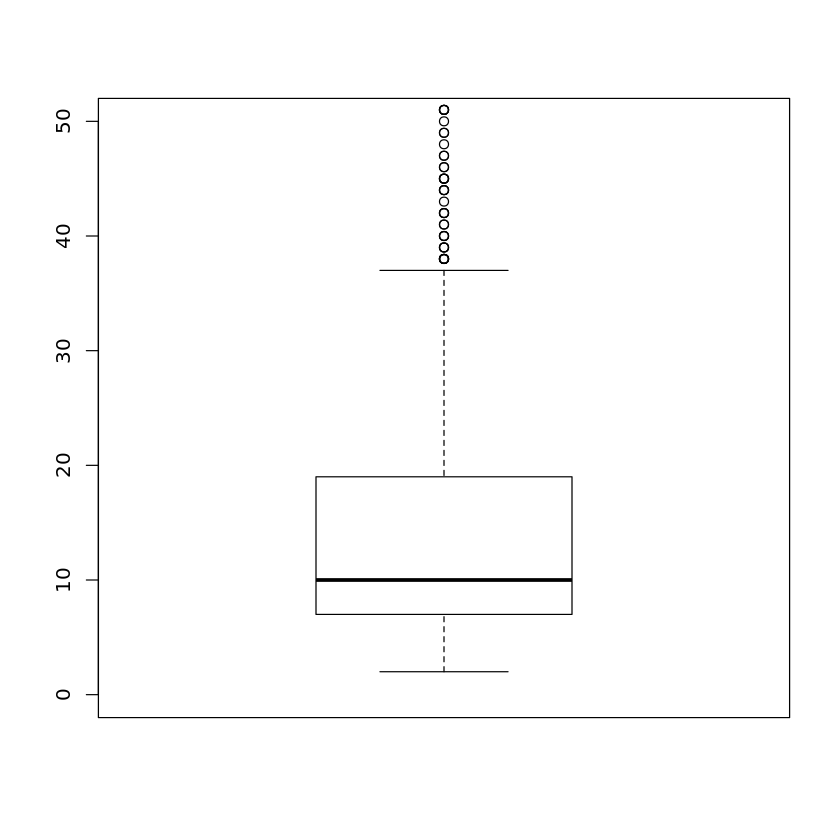

In [13]:
boxplot(s1, ylim=c(0,50))

In [14]:
summary(s1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    7.00   10.00   30.36   19.00  987.00 

In [15]:
dim(pValsAllAdj_Control)

[1]  400 6640

In [16]:
s1_Control <- apply(pValsAllAdj_Control, 1, function(x){return(length(which(x < 0.1)))})
head(s1_Control)

[1] 0 6 5 4 4 4

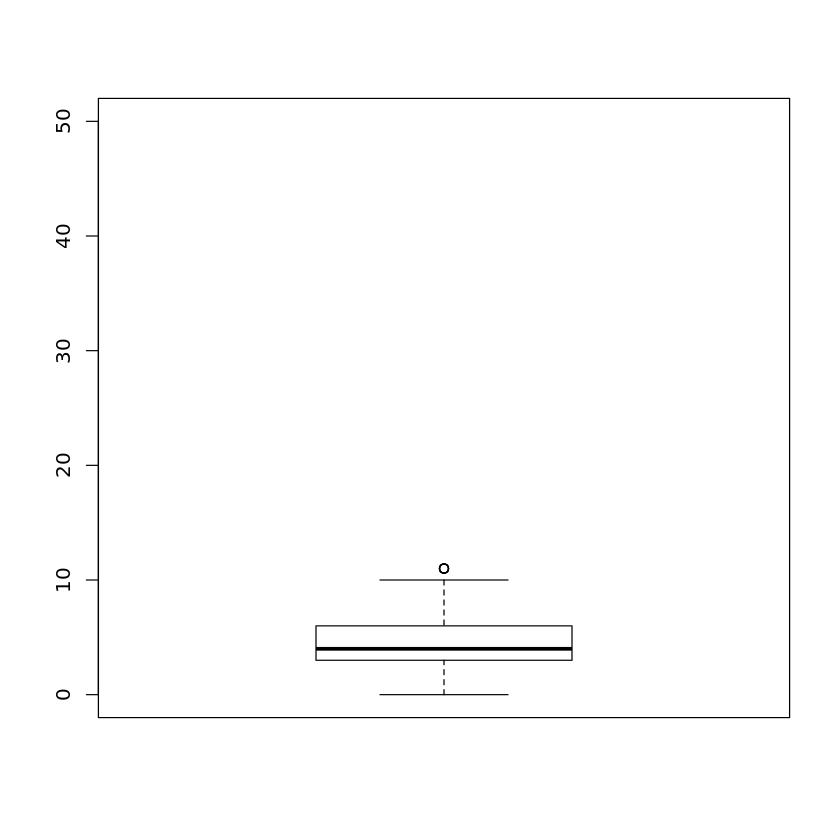

In [17]:
s1_Control <- s1_Control 
boxplot(s1_Control, ylim=c(0,50))

In [18]:
summary(s1_Control)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.000   4.000   4.518   6.000  11.000 

In [19]:
myTP = data.frame(data="KO", noAffectedGenes=s1)
myTP_Control = data.frame(data="Control", noAffectedGenes=s1_Control)
myTP <- rbind(myTP, myTP_Control)
myTP$data <- factor(myTP$data, levels= c("Control", "KO"))

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”
Warning message:
“Removed 132 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 132 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 132 rows containing non-finite values (stat_signif).”
Warning message:
“Removed 109 rows containing missing values (geom_violin).”


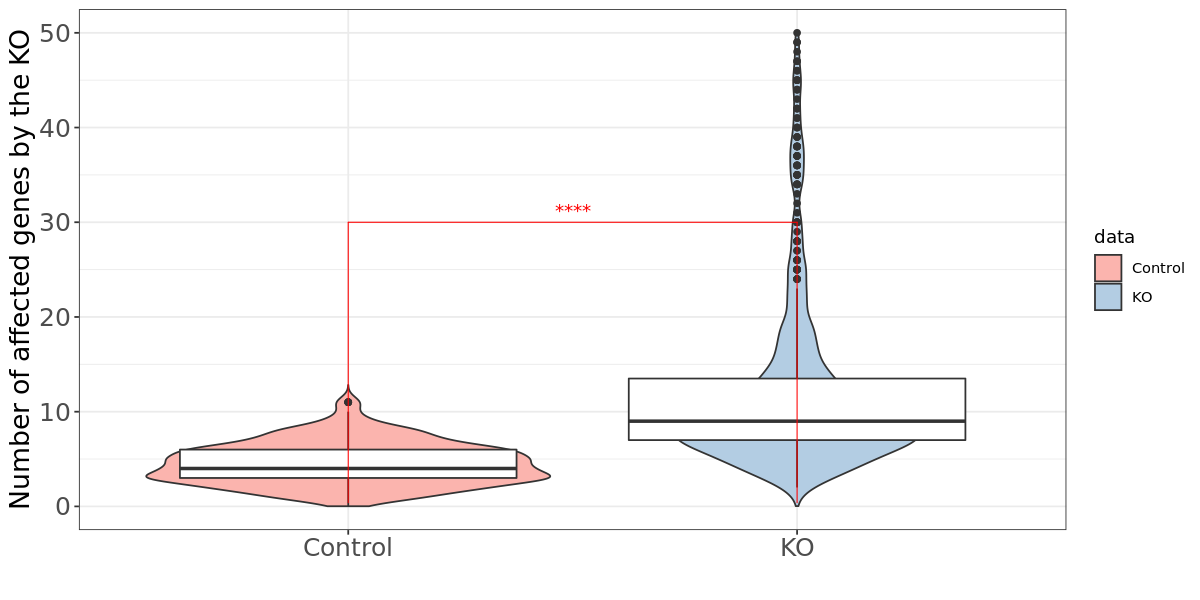

In [20]:
options(repr.plot.width=10, repr.plot.height=5)

ggplot(myTP, aes(x=data, y=noAffectedGenes)) + 
     geom_violin(trim=FALSE, aes(fill=data))+
     geom_boxplot()+theme_bw()+ 
     #stat_summary(fun.data = mean, geom = "text", size=6)+
        stat_compare_means(method="t.test",paired = FALSE,
                                comparisons = list(c("Control", "KO")),
                                color="red", method.args = list(alternative = "less"),
                                label.y = c(30), aes(label = ..p.signif..))+
     scale_fill_brewer(palette = "Pastel1")+
ylab("Number of affected genes by the KO")+
theme(axis.text = element_text(size=15),
              axis.title =  element_text(size=16))+ylim(0,50) +xlab("") 

In [21]:
summary(s1_Control)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.000   4.000   4.518   6.000  11.000 

In [ ]:
# sTemp <- s1
# names(sTemp) <- sapply(names(sTemp), function(x){strsplit(x,"_")[[1]][2]})
# clusteringOld <- read.csv("/home/beraslan/jovian-work/analysisSingle/GuideModules_10__ClustersNotRegressed.csv")
# table(sTemp[clusteringOld$geneName])

,s1,Freq
,<fct>,<int>
1,2,9
2,3,27
3,4,46
4,5,56
5,6,74
6,7,101


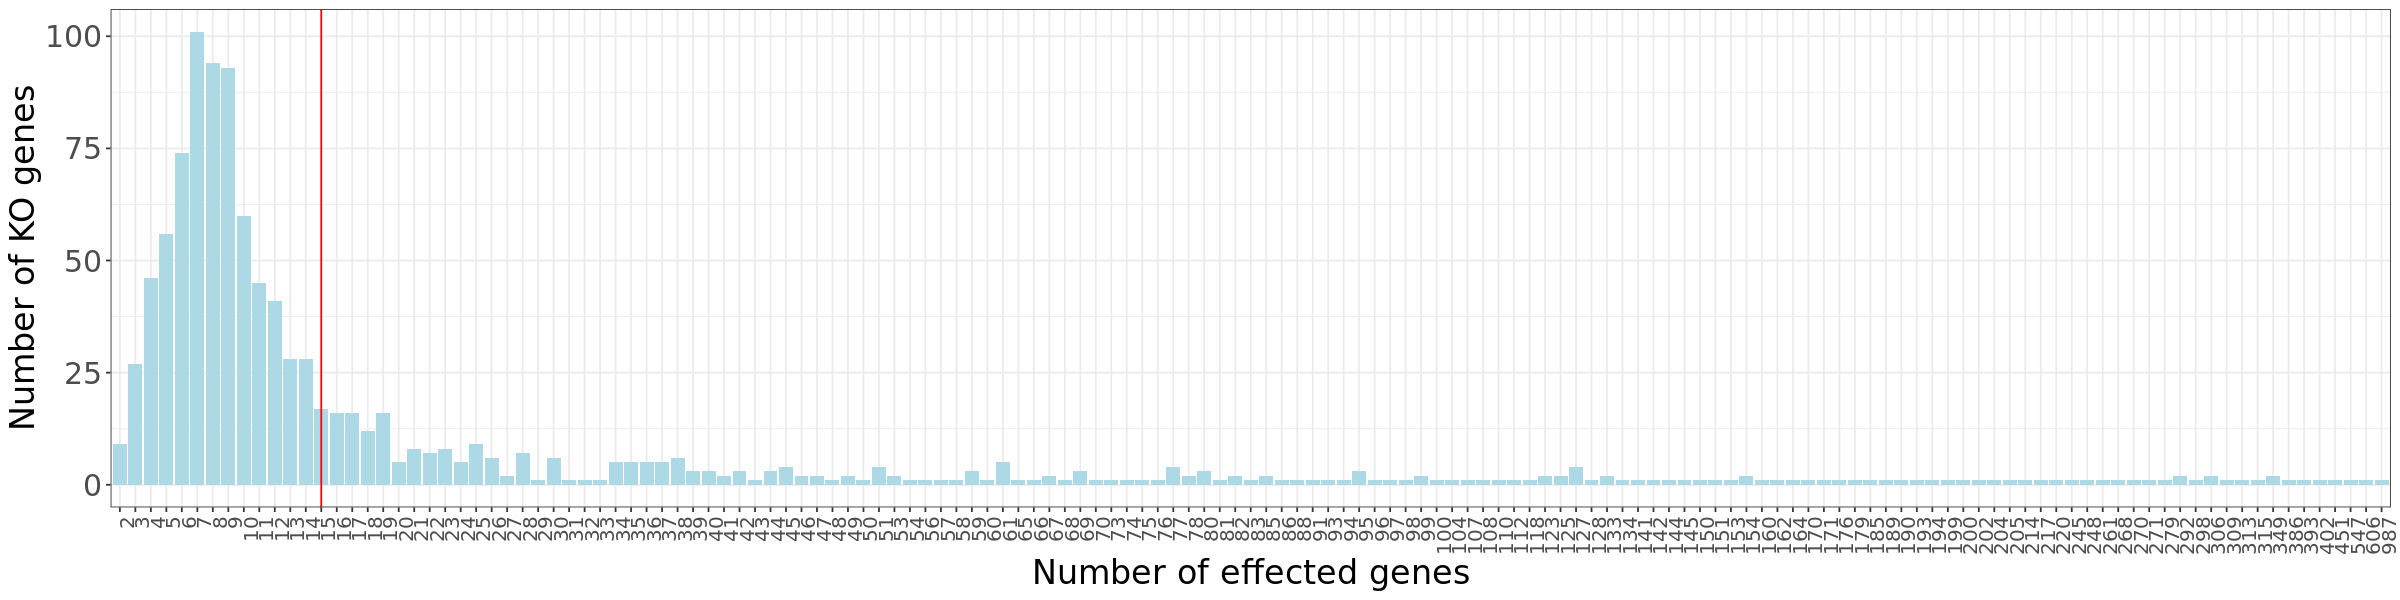

In [22]:

s1Freq <- data.frame(table(s1), stringsAsFactors = FALSE)
head(s1Freq)
s1Freq$s1 <- as.character(s1Freq$s1)
s1Freq$s1 <- factor(as.character(s1Freq$s1), levels=as.character(sort(as.numeric(s1Freq$s1))))
 
options(repr.plot.width=20, repr.plot.height=5)
ggplot(data=s1Freq, aes(x=s1, y=Freq)) +
    geom_bar(stat="identity", fill="lightblue")+
    theme_bw()+theme(axis.text.x = element_text(angle = 90, hjust = 1, size=12), axis.text.y = element_text(size=18), axis.title = element_text(size=20) )+
    xlab("Number of effected genes")+ylab("Number of KO genes")+geom_vline(xintercept = (targetCutOff), color="red")
  

In [23]:

tpKO <- data.frame(x=s1, type="KO")
tpC <- data.frame(x=s1_Control, type="Control")

tpKO <- rbind(tpKO, tpC)
tpKO$type <- factor(tpKO$type, levels=c("Control","KO"))

Warning message:
“Removed 30 rows containing non-finite values (stat_density).”


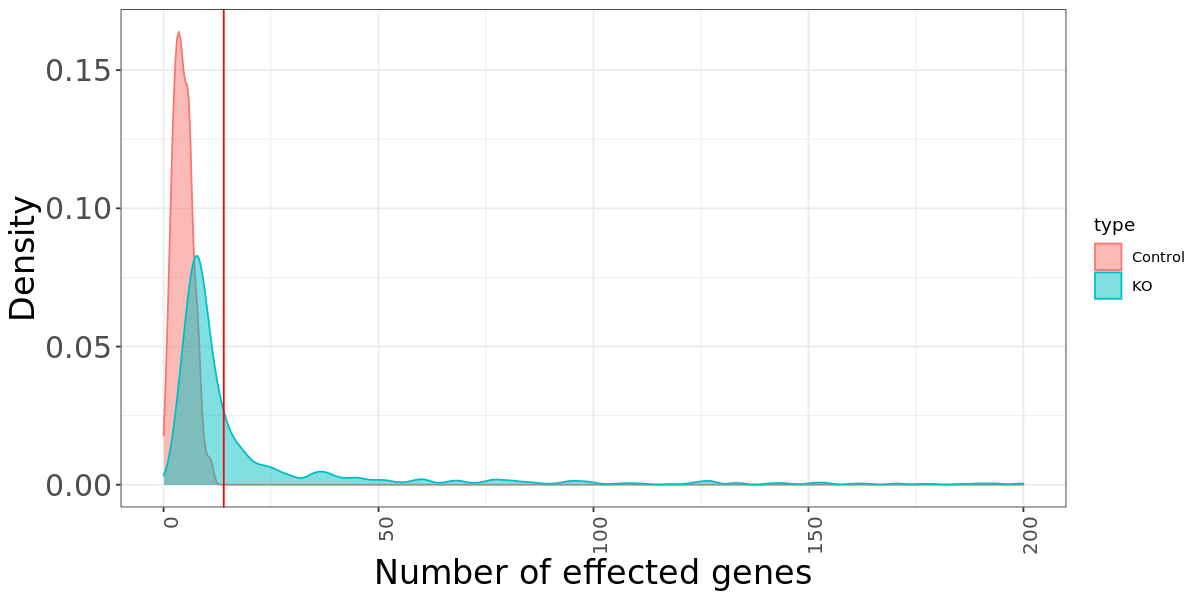

In [24]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(data=tpKO, aes(x=x, color=type, fill=type)) +
    geom_density(alpha=0.5)+
    theme_bw()+theme(axis.text.x = element_text(angle = 90, hjust = 1, size=12), axis.text.y = element_text(size=18),
                     axis.title = element_text(size=20) )+
    xlab("Number of effected genes")+ylab("Density")+geom_vline(xintercept = (targetCutOff), color="red")+xlim(0,200)
  

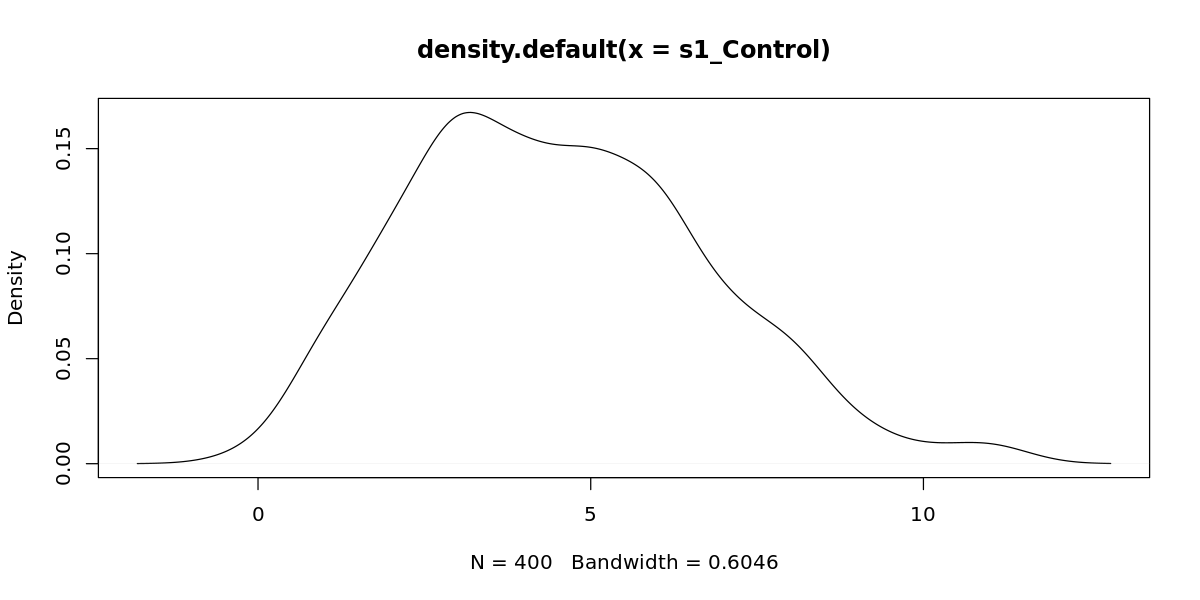

In [25]:
plot(density(s1_Control))

In [26]:
s1Freq_Control <- data.frame(table(s1_Control), stringsAsFactors = FALSE)
head(s1Freq_Control)

,s1_Control,Freq
,<fct>,<int>
1,0,3
2,1,27
3,2,46
4,3,73
5,4,60
6,5,61


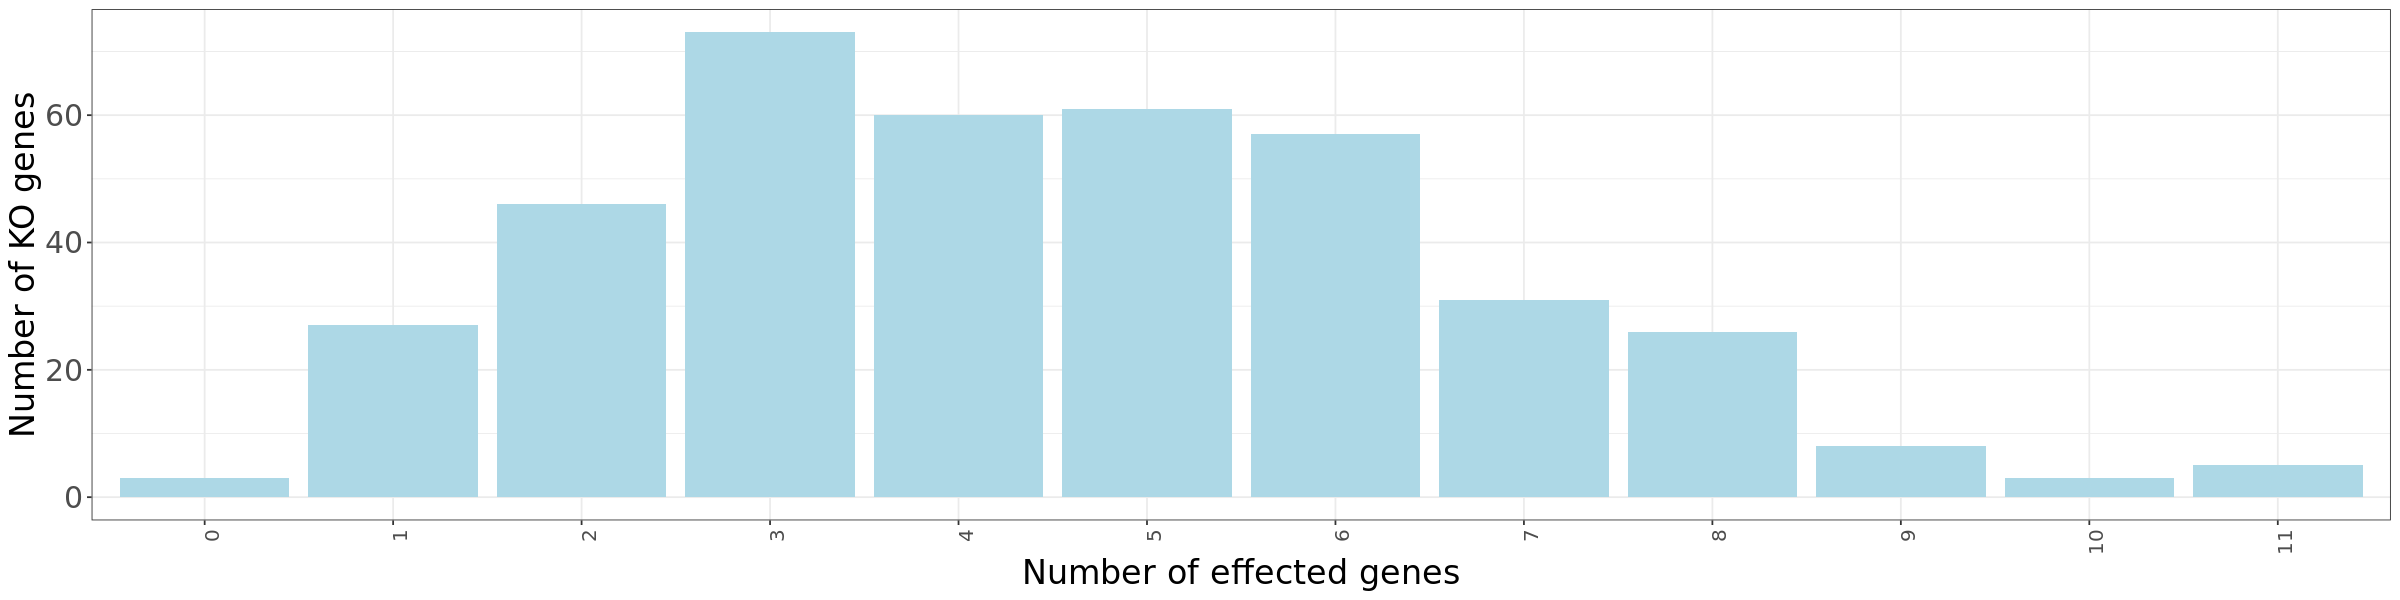

In [27]:

s1Freq_Control$s1_Control <- as.character(s1Freq_Control$s1_Control)
s1Freq_Control$s1_Control <- factor(as.character(s1Freq_Control$s1_Control), levels=as.character(sort(as.numeric(s1Freq_Control$s1_Control))))
 
options(repr.plot.width=20, repr.plot.height=5)
ggplot(data=s1Freq_Control, aes(x=s1_Control, y=Freq)) +
    geom_bar(stat="identity", fill="lightblue")+
    theme_bw()+theme(axis.text.x = element_text(angle = 90, hjust = 1, size=12), axis.text.y = element_text(size=18), axis.title = element_text(size=20) )+
    xlab("Number of effected genes")+ylab("Number of KO genes")+geom_vline(xintercept = (targetCutOff), color="red")
 

In [28]:
dim(coefsAll[s1>targetCutOff,])

[1]  329 6685

In [29]:
coefsAll <- coefsAll[s1>targetCutOff,]
pValsAllAdj <- pValsAllAdj[s1>targetCutOff,]

In [30]:
dim(coefsAll)

[1]  329 6685

In [31]:
s2 <- apply(pValsAllAdj, 2, function(x){return(length(which(x < 0.1)))})
s2Freq <- data.frame(table(s2), stringsAsFactors = FALSE)
# head(s2Freq)

In [54]:
head(s2Freq)

,s2,Freq
,<fct>,<int>
1,0,2437
2,1,1712
3,2,837
4,3,412
5,4,246
6,5,150


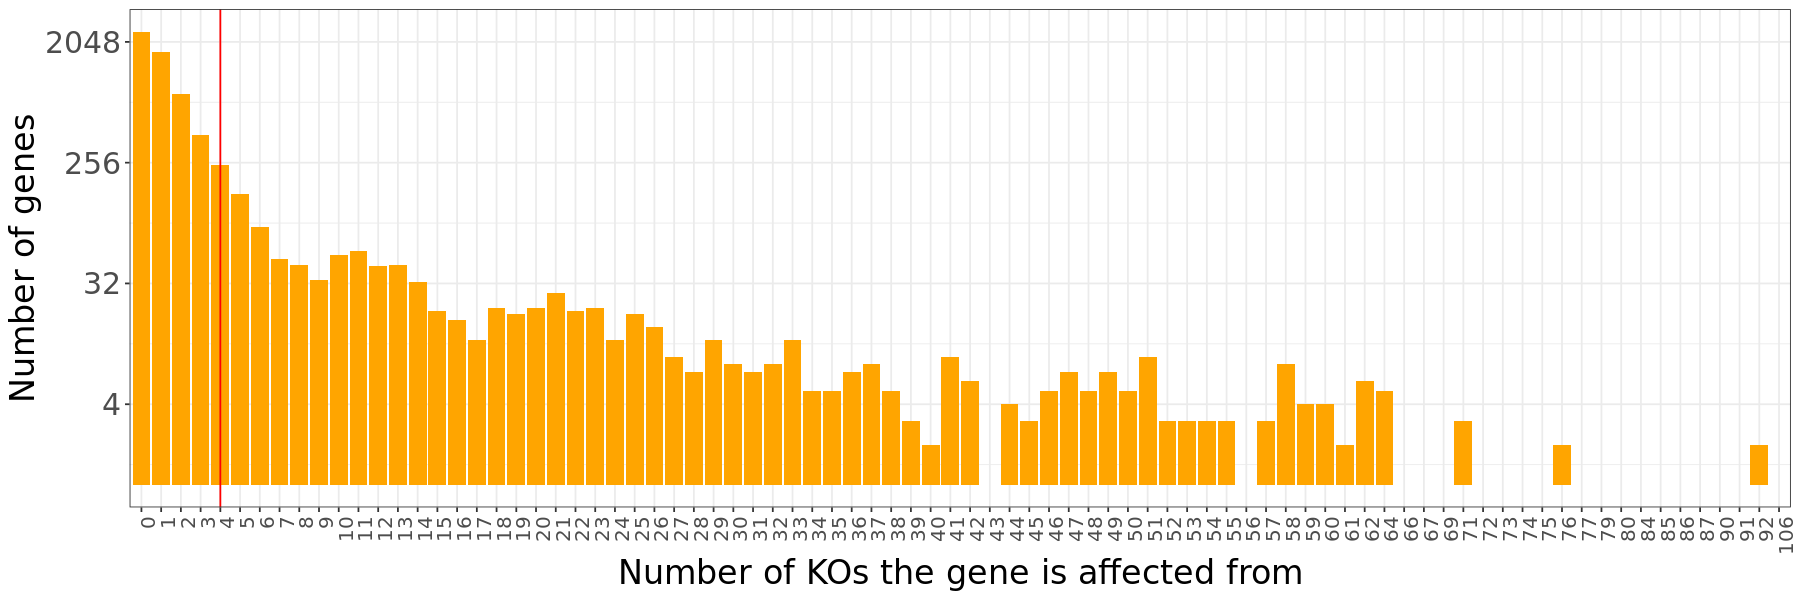

In [55]:
s2Freq$s2 <- as.character(s2Freq$s2)
s2Freq$s2 <- factor(as.character(s2Freq$s2), levels=as.character(sort(as.numeric(s2Freq$s2))))
 
options(repr.plot.width=15, repr.plot.height=5)
ggplot(data=s2Freq, aes(x=s2, y=Freq)) +
    geom_bar(stat="identity", fill="orange")+
    theme_bw()+theme(axis.text.x = element_text(angle = 90, hjust = 1, size=12), axis.text.y = element_text(size=18), 
                     axis.title = element_text(size=20) )+scale_y_continuous(trans="log2")+
    ylab("Number of genes")+xlab("Number of KOs the gene is affected from")+geom_vline(xintercept = (geneCutOff+1), color="red")
  

In [56]:
s2 <- apply(pValsAllAdj, 2, function(x){return(length(which(x < 0.1)))})
s2Freq <- data.frame(table(s2), stringsAsFactors = FALSE)
max(s2Freq

ERROR: Error in parse(text = x, srcfile = src): <text>:4:0: unexpected end of input
2: s2Freq <- data.frame(table(s2), stringsAsFactors = FALSE)
3: max(s2Freq
  ^


Warning message:
“Removed 6 rows containing non-finite values (stat_density).”


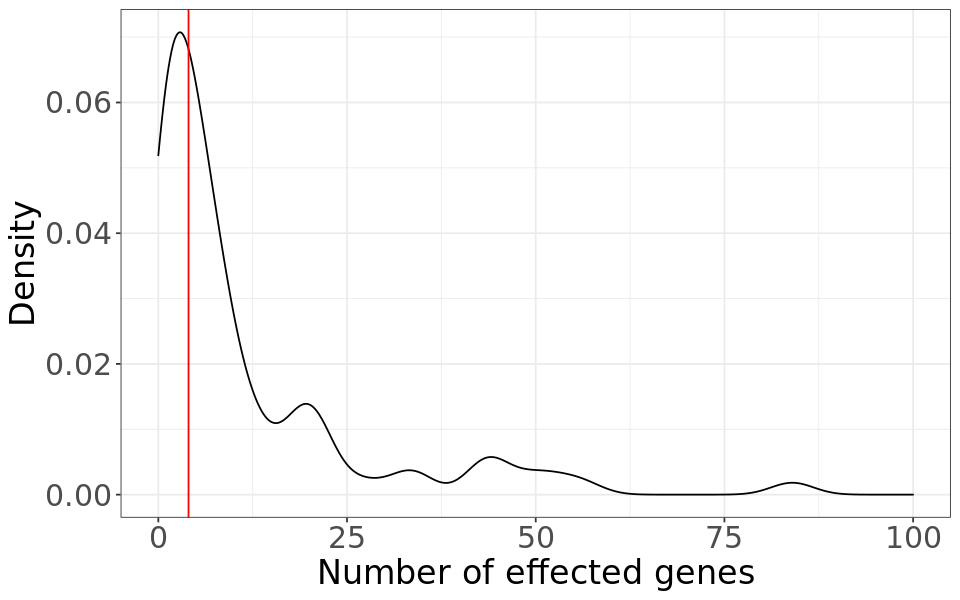

In [50]:
options(repr.plot.width=8, repr.plot.height=5)

s2 <- apply(pValsAllAdj, 2, function(x){return(length(which(x < 0.1)))})
s2Freq <- data.frame(table(s2), stringsAsFactors = FALSE)

ggplot(data=s2Freq, aes(x=Freq)) +
    geom_density(alpha=0.5)+
    theme_bw()+theme(axis.text = element_text(size=18), 
                     axis.title = element_text(size=20) )+
    xlab("Number of KOs")+ylab("Density")+
geom_vline(xintercept = (geneCutOff), color="red")+xlim(0,100)


In [39]:
dim(coefsAll[, s2 > geneCutOff])

[1]  329 1041

In [ ]:
coefsAll <- coefsAll[, s2 > geneCutOff]
pValsAllAdj <- pValsAllAdj[, s2 > geneCutOff]

In [ ]:
dim(coefsAll)

In [ ]:
write.csv(coefsAll, "/home/beraslan/jovian-work/analysisSingle/MixedEffectLMOutputs/ME_SignificantBetaCoefs.csv", quote=FALSE)
write.csv(pValsAllAdj, "/home/beraslan/jovian-work/analysisSingle/MixedEffectLMOutputs/ME_AdjustedPValues.csv", quote=FALSE)

In [ ]:
# w <- basis(estim.r)
# dim(w)
# # get matrix H
# h <- coef(estim.r)
# dim(h)

In [ ]:
estim.r <- nmf(coefsAllPos, 6:40, nrun=100, seed=123456, .opt='vP')
saveRDS(estim.r, "./RDSFiles/estimR_ClustersAsCovariate_v2.rds")

#estim.r <- readRDS("./RDSFiles/estimR.rds")

In [ ]:
# options(repr.plot.width=15, repr.plot.height=9)
# plot(estim.r)

In [ ]:
#consensusmap(estim.r)

In [ ]:
coefsAllPos.random <- randomize(coefsAllPos)

In [ ]:
estim.r.random <- nmf(coefsAllPos.random, 6:40, nrun=100, seed=123456, .opt='vP')
saveRDS(estim.r.random, "./RDSFiles/estimR_Random_ClustersAsCovariate_v2.rds")
#estim.r.random <- readRDS("./RDSFiles/estimR_Random.rds")

In [ ]:
options(repr.plot.width=30, repr.plot.height=15)
plot(x=estim.r, y=estim.r.random)+theme(strip.text = element_text(size=40),
                                    axis.text.y = element_text(size=25),
                                    axis.text.x = element_text(size=12),
                                    legend.text = element_text(size=15),
                                    title = element_text(size=20))+ggtitle("NMF Rank Survey - Clusters as covariate")+geom_vline(xintercept = 15, color="red")

In [ ]:
#res.multi.method <- nmf(coefsAllPos, 20, list('brunet', 'KL','lee', 'Frobenius','nsNMF', 'offset'), nrun=100, seed=123456,  .options='t')
#saveRDS(res.multi.method, "./RDSFiles/res.multi.method.rds")
#res.multi.method <- readRDS("./RDSFiles/res.multi.method.rds")

In [ ]:
compare(res.multi.method)

In [ ]:
allResiduals = list()
for(elem in res.multi.method){
    allResiduals = lappend(allResiduals, elem@residuals[-1])
}
allResiduals <- data.frame(do.call(cbind, allResiduals))
colnames(allResiduals) <- res.multi.method@names
allResiduals$xVar <- rownames(allResiduals)
allResidualsMelt <- melt(allResiduals, id.vars = "xVar")
allResidualsMelt$xVar <- as.numeric(allResidualsMelt$xVar)

In [ ]:
options(repr.plot.width=8, repr.plot.height=4)

ggplot(allResidualsMelt[allResidualsMelt$variable %in% c("brunet","lee","nsNMF","offset"),], aes(x=xVar, y=value, color=variable))+geom_point(alpha=0.5)+geom_line(alpha=0.5)+theme_bw()+ylab("Residuals")+xlab("Number of iterations")


In [ ]:
bestFit <- nmf(coefsAllPos, 20, method = 'brunet', nrun=2000, seed="random",  .options='t')

In [ ]:
myH <- k@fit@H
myW <- k@fit@W
rownames(myH) <- 1:nrow(myH)
colnames(myW) <- 1:ncol(myW)

In [ ]:
head(myW)

In [ ]:
dim(myH)

In [ ]:
M = cor(t(myH), method = "pearson")

In [ ]:
dim(M)

In [ ]:
options(repr.plot.width=8, repr.plot.height=3)

res.pca <- prcomp(M, scale = FALSE)
fviz_eig(res.pca)


In [ ]:
# var <- get_pca_var(res.pca)
# # Contributions of variables to PC1
# fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)


In [ ]:
dim(M)

In [ ]:
library("pheatmap")
diag(M) <- 0
M[M>0.4] = 0.4
M[M < -0.4] = -0.4

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)

pheatmap(M, clustering_method="ward.D2", show_colnames = TRUE, show_rownames = TRUE, cluster_cols = FALSE, cluster_rows=FALSE,
                clustering_distance_rows="euclidean", clustering_distance_cols="euclidean")

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)

pheatmap(M, clustering_method="ward.D2", show_colnames = TRUE, show_rownames = TRUE,
                clustering_distance_rows="euclidean", clustering_distance_cols="euclidean")

In [ ]:
boxplot(M)
abline(h=0.3, col="red")
abline(h= -0.3, col="red")
axis(2, at = seq(-0.5,0.5,0.1))

In [ ]:
M2 = cor((myW), method = "pearson")

In [ ]:
dim(M2)

In [ ]:
options(repr.plot.width=8, repr.plot.height=3)

res.pca <- prcomp(M2, scale = FALSE)
fviz_eig(res.pca)


In [ ]:
diag(M2) <- 0
boxplot(M2)
abline(h=0.3, col="red")
abline(h= -0.3, col="red")
axis(2, at = seq(-0.5,0.5,0.1))

In [ ]:
library("pheatmap")

M2[M2>0.4] = 0.4
M2[M2 < -0.4] = -0.4

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)

pheatmap(M2, clustering_method="ward.D2", show_colnames = TRUE, show_rownames = TRUE, cluster_cols = FALSE, cluster_rows=FALSE,
                clustering_distance_rows="euclidean", clustering_distance_cols="euclidean")

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)

pheatmap(M2, clustering_method="ward.D2", show_colnames = TRUE, show_rownames = TRUE,
                clustering_distance_rows="euclidean", clustering_distance_cols="euclidean")

In [ ]:
M1 <- M
#M1[M1>0.3] = 0.3
#M1[M1 < -0.3] = -0.3
options(repr.plot.width=10, repr.plot.height=10)
library("pheatmap")
hm1 <- pheatmap(M1,show_rownames = FALSE, show_colnames = FALSE, cutree_cols = 7, cutree_rows = 7,
         color=colorRampPalette(c("deepskyblue3","white","hotpink3"))(200), clustering_method="ward.D2", 
                clustering_distance_rows="euclidean", clustering_distance_cols="euclidean")